# OVERVIEW:

This file, TIPP_DLF_Q1.ipynb, is the main file to run for Q1. The Supporting files used for Q1 are
1. Model.py
2. Data.py
3. Analyser.py

The output for Q1 is at folder /output_Q1 \
The data inputfor Q1 is at folder /data 

In [1]:
import warnings
import pandas as pd
from sklearn import preprocessing
from Data import DataManager
from Model import ModelManager
from Analyser import Analyser
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', 51)
output1='output_Q1/'
size=(150,100)
warnings.filterwarnings('ignore')
applyOHE=False

Using TensorFlow backend.


# 1. Read from Dataset

In [2]:
dataManager=DataManager(applyOHE)
dfFullData=dataManager.readData()

# 2. Analysing Data from Dataset

In [3]:

dfFullData.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
dfFullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Base on displot 01_INITIAL_DistPlot.png, boxplot 02_OUTLIER_BoxPlot.png, data information above and the original datset:
# 1.some feature in dataset does not have normal distibution thus has to be skewed,
# 2.The true label, 'diagnosis' has binary values and the ratio of Yes to No is disproportionate thus stratification has to be done.
# 3.The range of numercal values in some features is wide thus has to be scaled down.
# 4.The true label, 'diagnosis' has to be converted to numbers via label encoding since it has only 2 values
# 5.There are some features with outliers, thus outliers has to be removed
# 6.Features 'ID' and 'Unnamed' has to be dropped as they are not useful
# 7. There are no empty cells
# In addition, the follwing steps also has to be checked:

# 7.Check for duplicates
# 8.Check for high correlation between features

analyser=Analyser(output1)
# Display Histogram.To check general data distibution on numrical data after unskew. File output is at \output_Q1\01_INITIAL_DistPlot.png
analyser.histogramOrBoxPlotAnalysis(dfFullData,strCols=True,hist=True,boxSize=size,fileName='01_INITIAL')

In [6]:
# Display Boxplot.To check on outliers on numrical data which has been scaled. File output is at \output_Q1\02_OUTLIER_BoxPlot.png
analyser.histogramOrBoxPlotAnalysis(dfFullData,strCols=True,hist=False,boxSize=size,fileName='02_OUTLIER')

# 3. Data Pre Process

### 3.1 Remove unnecessary features

In [7]:
# Drop cells which is not useful in classification
dropColslist=['id','Unnamed: 32']
df_drop_idUnamed=dataManager.dropUnnecessaryColumns(dfFullData,dropColslist)
df_drop_idUnamed.info()

Dropping datapoints...
Dropped datapoints = 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-n

### 3.2 Check duplicated records

In [8]:
# Check for duplicates. There are no duplicates
duplicateRowsDF=df_drop_idUnamed[df_drop_idUnamed.duplicated()]
duplicateRowsDF

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


### 3.3 Check for skewed data and try to normalize records

In [9]:
# Check for skewed data in numerical data and process skewed data to normalize it
dfskew=dataManager.checkSkew(df_drop_idUnamed)
dfskew.to_excel(output1+"DF_Skew.xlsx")
dfskew
# Display Histogram.To check general data distibution on numrical data after unskew. File output is at \output_Q1\04_SKEW_DistPlot.png
analyser.histogramOrBoxPlotAnalysis(dfskew,strCols=False,hist=True,boxSize=size,fileName='04_SKEW')

area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
symmetry_mean              0.725609
texture_mean               0.650450
texture_worst              0.498321
concave points_worst       0

### 3.4 Apply encoding on dataset.

In [10]:
# OHE or LE applied on non numeric data
df_encode=dataManager.applyEncodingToNonNumericData(dfskew)
#Display One hot encoding table
df_encode
# Display Histogram.To check general data distibution on numrical data after OHE. File output is at \output_Q1\05_Encode_DistPlot.png
analyser.histogramOrBoxPlotAnalysis(df_encode,strCols=True,hist=True,boxSize=size,fileName='05_Encode')

### 3.5 Perform scaling on encoded data.

In [11]:
# Perform scaling on encoded data
df_Scale =dataManager.scaleData(df_encode)
# Display one hot encoded data which has been scaled
df_Scale.to_excel(output1+"DF_Scale.xlsx")
df_Scale
# Display Histogram.To check general data distibution on all data after  scaling.File output is at \output_Q1\06_SCALE_DistPlot.png
analyser.histogramOrBoxPlotAnalysis(df_Scale,strCols=True,hist=True,boxSize=size,fileName='06_SCALE')

Scaling data using MinMax scaler...


### 3.6 Remove outlier data.

In [12]:
# Remove outliers on dataframes
# Base on boxplot, there are outliers in data frame
df_noOutlier =dataManager.removeOutlier(df_Scale)
df_noOutlier.to_excel(output1+"DF_NoOutlier.xlsx")

In [13]:
# Display Histogram.To check general data distibution on all data 
# after  outlier removed.File output is at \output_Q1\07_NO_OUTLIER.png
analyser.histogramOrBoxPlotAnalysis(df_noOutlier,strCols=True,hist=True,boxSize=size,fileName='07_NO_OUTLIER')

### 3.7 Analyse Correlation between features and remove highly correlated featuers.

In [14]:
#Correlation between features with a threshold pf 90%
df_corr_ohe=dataManager.showCorr(df_noOutlier,0.90)
df_corr_ohe

,feature1,feature2,correlation,abs_correlation
31,radius_mean,area_mean,0.999562,0.999562
401,radius_worst,area_worst,0.999192,0.999192
30,radius_mean,perimeter_mean,0.998416,0.998416
84,perimeter_mean,area_mean,0.997871,0.997871
400,radius_worst,perimeter_worst,0.994394,0.994394
414,perimeter_worst,area_worst,0.993796,0.993796
129,area_mean,area_worst,0.978535,0.978535
126,area_mean,radius_worst,0.977771,0.977771
103,perimeter_mean,perimeter_worst,0.977498,0.977498
101,perimeter_mean,radius_worst,0.976973,0.976973


In [15]:
# Base on correlation table, some features  has 
# high correlation.Will have to drop some of them before running model, 

dropColslist=['radius_mean','perimeter_mean','radius_worst','area_mean','radius_se','area_worst','perimeter_se','concavity_mean','texture_mean','concave points_mean']
df_Final=dataManager.dropUnnecessaryColumns(df_noOutlier,dropColslist)
df_Final.to_excel(output1+"DF_Final.xlsx")
df_Final

Dropping datapoints...
Dropped datapoints = 0


,diagnosis,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.300320,0.203629,0.399431,0.144035,0.165719,0.533614,0.120919,0.086148,0.055241,0.258749,0.087226,0.092300,0.463405,0.713090,0.362739,0.207492,0.266563,0.667873,0.268206,0.234858
1,1,0.526788,0.465372,0.530129,0.214963,0.186275,0.589148,0.152697,0.296860,0.112718,0.395987,0.211331,0.128597,0.524811,0.687799,0.500112,0.470483,0.458033,0.851657,0.448280,0.225054
2,1,0.442667,0.380177,0.397889,0.190206,0.184132,0.590163,0.335580,0.176875,0.165825,0.363009,0.140254,0.147587,0.225161,0.686569,0.453711,0.229639,0.414467,0.589518,0.183681,0.151114
3,1,0.689392,0.496615,0.539179,0.556641,0.224643,0.302748,0.199366,0.245746,0.108096,0.219771,0.199126,0.146435,0.473604,0.445424,0.726017,0.568507,0.528266,0.628391,0.522406,0.471729
4,1,0.391031,0.303658,0.390171,0.160077,0.181020,0.459880,0.089594,0.092002,0.066814,0.200926,0.084330,0.044976,0.581751,0.690659,0.498791,0.291131,0.395314,0.691570,0.334887,0.198439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0,0.433489,0.315337,0.256392,0.251622,0.413343,0.323922,0.190655,0.193836,0.061444,0.313531,0.186910,0.154182,0.711404,0.425849,0.364757,0.254974,0.153379,0.390202,0.158212,0.195225
507,1,0.529490,0.658036,0.570246,0.401896,0.272009,0.643738,0.161246,0.320258,0.226386,0.503494,0.183603,0.185884,0.625450,0.788284,0.475622,0.464510,0.624225,0.886777,0.306538,0.300624
508,1,0.539391,0.326010,0.355060,0.134618,0.345419,0.711489,0.294909,0.210449,0.151896,0.471266,0.047365,0.117003,0.548601,0.741177,0.477610,0.237144,0.423846,0.783665,0.115233,0.112275
509,1,0.419933,0.285415,0.368509,0.115344,0.637984,0.601257,0.139612,0.173901,0.116123,0.323475,0.160720,0.056140,0.813598,0.697957,0.314130,0.214269,0.343386,0.590528,0.229550,0.079139


# 4. Model Management process
The tuning of the hyper paramaters was done using grid search to find best paramters
The best parameters is the used to train and evaluate the model with the following results:

Eval test loss: 0.1166877551535506 \
Eval test accuracy: 96.11650705337524 \
Eval test precision: 94.28571462631226 \
Eval test recall: 94.28571462631226 \
Eval test false negative: 2.0 \
Eval test false positive: 2.0 \
Eval test true negative: 66.0 \
Eval test true positive: 33.0

The accuracy achieved is around 96%. Since the dataset is not balance in terms of lable, we shall look at precision and recall which is around 94%
which is a respectable value. Since model is design to predict whether a record is Malignant or benign, in this context, the more impt result to look at is
False negative as we do not want a patient to be improperly diagnosed of not having cancer when it is actually cancer. The False negative value is 2 which is low.
The model can still be improved but a more balanced dataset is required.

In [16]:
modMan=ModelManager(df_Final,dataManager.getTargetLable(),dataManager.seedValue)

Overall Feature shape: (511, 20)
Overall Target shape: (511, 1)
Train Feature shape: (408, 20)
Train Target shape: (408, 1)
Test Feature shape: (103, 20)
Test Target shape: (103, 1)


In [17]:
#Find the best hyper paramters to get best results
epoch=[23,20]
batSize=[20,15] 
optimizers=['rmsprop','adam']
outAct=['softmax','sigmoid']
hiddenUnit=[256,128]

dictParam={'epochs':epoch,'batch_size':batSize,'anOptimizer':optimizers,'outActivation':outAct,'hidUnit':hiddenUnit}
df_full,df_result,bestParam,bestScore,model=modMan.findOptimizeParamCV(dictParam,fold=3)

In [18]:
#Print full results to output_Q1/DF_Full_Result.xlsx
df_full.to_excel(output1+"DF_Full_Result.xlsx")

In [19]:
# Show the best parameter to be used after grid search
bestParam
df_param=pd.DataFrame([bestParam])
df_param

,anOptimizer,batch_size,epochs,hidUnit,outActivation
0,adam,15,23,128,sigmoid


In [20]:
#Print partial results to output_Q1/DF_Partial_Result.xlsx
df_result.to_excel(output1+"DF_Partial_Result.xlsx")
df_result.head()

,params,mean_test_score,std_test_score,rank_test_score
27,"{'anOptimizer': 'adam', 'batch_size': 15, 'epo...",0.963235,0.010399,1
31,"{'anOptimizer': 'adam', 'batch_size': 15, 'epo...",0.960784,0.009171,2
5,"{'anOptimizer': 'rmsprop', 'batch_size': 20, '...",0.960784,0.009171,2
21,"{'anOptimizer': 'adam', 'batch_size': 20, 'epo...",0.960784,0.018341,2
23,"{'anOptimizer': 'adam', 'batch_size': 20, 'epo...",0.958333,0.009171,5


In [21]:
# Show the best score after grid search
print('Best accuracy after grid search on training data: '+str(bestScore))

Best accuracy after grid search on training data: 0.9632352789243063


In [22]:
# Evaluating the best model found in grid search using Test data
X_test,y_test,X_train,y_train=modMan.getTestAndTrainData()
res=model.score(X_test,y_test)
print('Accuracy of grid search model on test data: '+str(res))

Accuracy of grid search model on test data: 0.9417475461959839


In [23]:
# Train new model with best parameters using full data set
df,nw,hist=modMan.trainModel(bestParam,X_train,y_train)

In [24]:
#Show mertrics after training with best parameters
df

,fold,loss,accuracy,Precision,Recall,FN,FP,TN,TP
0,1,0.120608,0.941176,1.000000,0.829787,8.0,0.0,89.0,39.0
1,2,0.063653,0.977941,1.000000,0.936170,3.0,0.0,89.0,44.0
2,3,0.065468,0.963235,0.976744,0.913043,4.0,1.0,89.0,42.0


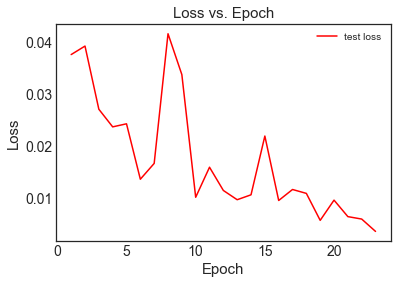

In [25]:
analyser.plot_loss(hist,'Loss')  

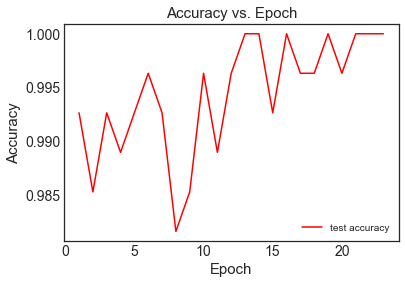

In [26]:
analyser.plot_accuracy(hist,'Accuracy') 

In [27]:
#Evaluate the trained model using test data
param= nw.evaluate(X_test, y_test,batch_size=bestParam.get('batch_size'))

103/103 [==============================] - 0s 91us/step


In [28]:
print('Eval test loss:', param[0])
print('Eval test accuracy:', param[1]*100)
print('Eval test precision:', param[2]*100)
print('Eval test recall:', param[3]*100)
print('Eval test false negative:', param[4])
print('Eval test false positive:', param[5])
print('Eval test true negative:', param[6])
print('Eval test true positive:', param[7])


Eval test loss: 0.1166877551535506
Eval test accuracy: 96.11650705337524
Eval test precision: 94.28571462631226
Eval test recall: 94.28571462631226
Eval test false negative: 2.0
Eval test false positive: 2.0
Eval test true negative: 66.0
Eval test true positive: 33.0


In [29]:
import pickle

data = [X_test,y_test,X_train,y_train]
with open(output1+'Q1_Data.pickle', 'wb+') as out_file:
    pickle.dump(data, out_file)

nw.save(output1+"Q1_ANN_model.h5") 

